Libraly import

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from DataConverter import FileTransform
import numpy as np

Import data set, Mushroom data set

In [115]:
FileTransform('mushrooms.csv', 'mushroom_full_text.csv')
df = pd.read_csv("mushrooms_full_text.csv")
df.head(5)

CSV conversion complete. The new file is saved as 'mushrooms_full_text.csv'.


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [117]:
print(f"sum of duplicate column: {sum(df.duplicated())}")
print("Data attribute list")
df.describe().T

sum of duplicate column: 0
Data attribute list


,count,unique,top,freq
class,8124,2,edible,4208
cap-shape,8124,6,convex,3656
cap-surface,8124,4,scaly,3244
cap-color,8124,10,brown,2284
bruises,8124,2,no,4748
odor,8124,9,none,3528
gill-attachment,8124,2,free,7914
gill-spacing,8124,2,close,6812
gill-size,8124,2,broad,5612
gill-color,8124,12,buff,1728


From Table, drop a veil-type because it have only one feature.

In [118]:
#counting Null
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [119]:
for i in df.columns:
    missing = len(df[df[i]=='missing'])
    percentage = missing / len(df) *100
    print(f'Missing data of {i} is: {missing}, {percentage:.2f} % of all data')


Missing data of class is: 0, 0.00 % of all data
Missing data of cap-shape is: 0, 0.00 % of all data
Missing data of cap-surface is: 0, 0.00 % of all data
Missing data of cap-color is: 0, 0.00 % of all data
Missing data of bruises is: 0, 0.00 % of all data
Missing data of odor is: 0, 0.00 % of all data
Missing data of gill-attachment is: 0, 0.00 % of all data
Missing data of gill-spacing is: 0, 0.00 % of all data
Missing data of gill-size is: 0, 0.00 % of all data
Missing data of gill-color is: 0, 0.00 % of all data
Missing data of stalk-shape is: 0, 0.00 % of all data
Missing data of stalk-root is: 2480, 30.53 % of all data
Missing data of stalk-surface-above-ring is: 0, 0.00 % of all data
Missing data of stalk-surface-below-ring is: 0, 0.00 % of all data
Missing data of stalk-color-above-ring is: 0, 0.00 % of all data
Missing data of stalk-color-below-ring is: 0, 0.00 % of all data
Missing data of veil-type is: 0, 0.00 % of all data
Missing data of veil-color is: 0, 0.00 % of all data

Drop a Missing row

In [120]:
df = df.drop(df[df['stalk-root'] == '?'].index)
print(f"sum of duplicate column: {sum(df.duplicated())}")
print("Data attribute list")
df.describe().T

sum of duplicate column: 0
Data attribute list


,count,unique,top,freq
class,8124,2,edible,4208
cap-shape,8124,6,convex,3656
cap-surface,8124,4,scaly,3244
cap-color,8124,10,brown,2284
bruises,8124,2,no,4748
odor,8124,9,none,3528
gill-attachment,8124,2,free,7914
gill-spacing,8124,2,close,6812
gill-size,8124,2,broad,5612
gill-color,8124,12,buff,1728


In [121]:
df = df.drop(['veil-type'], axis=1) #Drop veil type (only one feature)

Correlation Plot

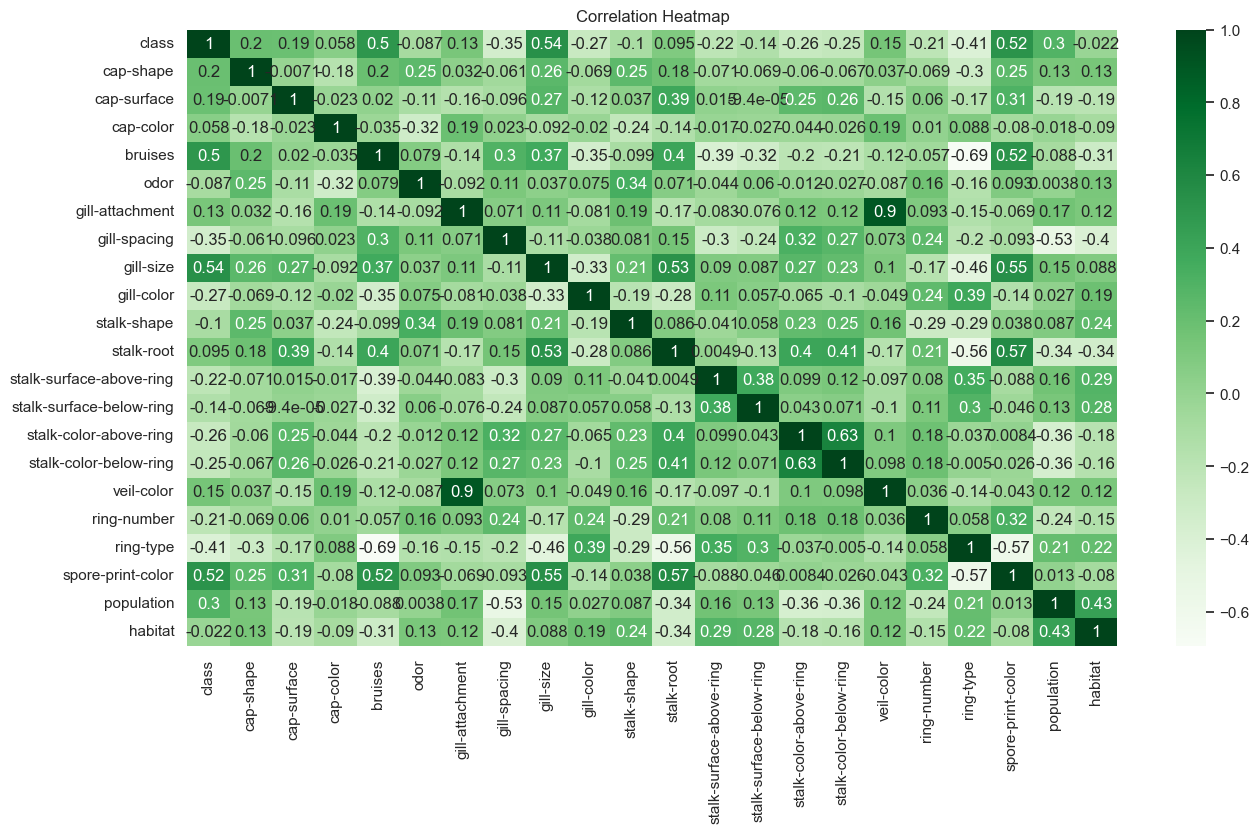

In [122]:
#Encode data
df_encode = df.apply(LabelEncoder().fit_transform)

plt.figure(figsize=(15, 8))

sb.heatmap(df_encode.corr(), annot= True, cbar = True, cmap= 'Greens')

plt.title('Correlation Heatmap')

plt.show()

from warnings import filterwarnings
#Pair plot
filterwarnings("ignore", category=FutureWarning)

#sb.pairplot(df_encode)

Feature Distribution plot

C:\Users\siriw\AppData\Local\Temp\ipykernel_22900\470747114.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5, 5))


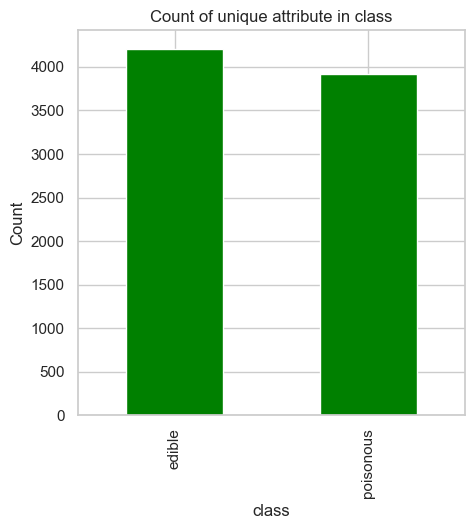

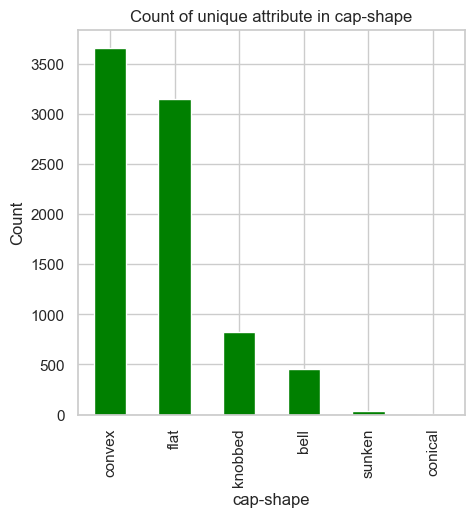

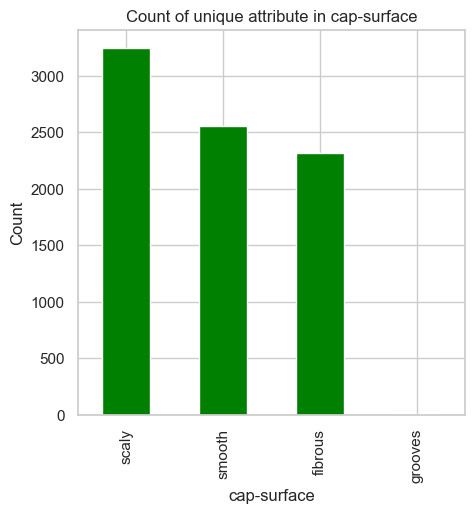

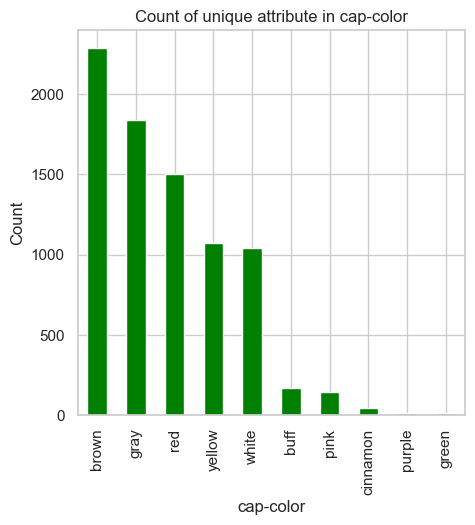

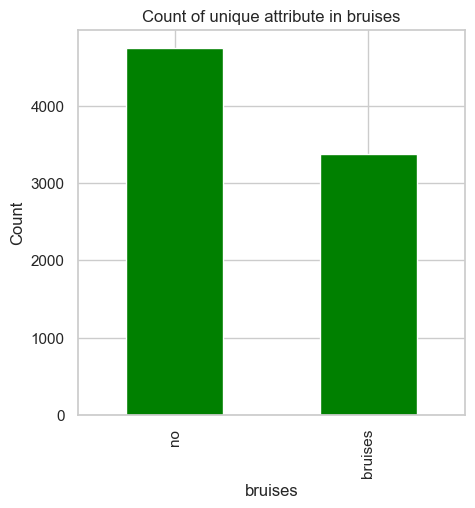

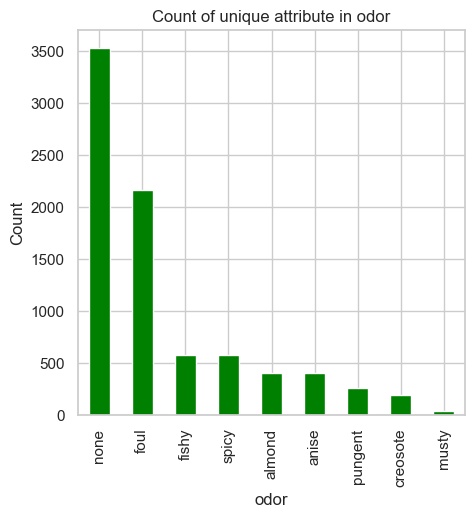

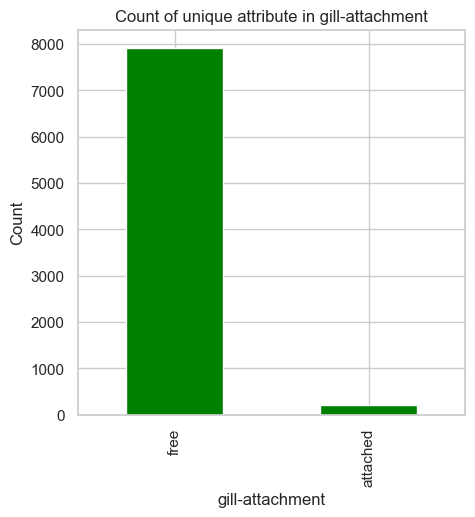

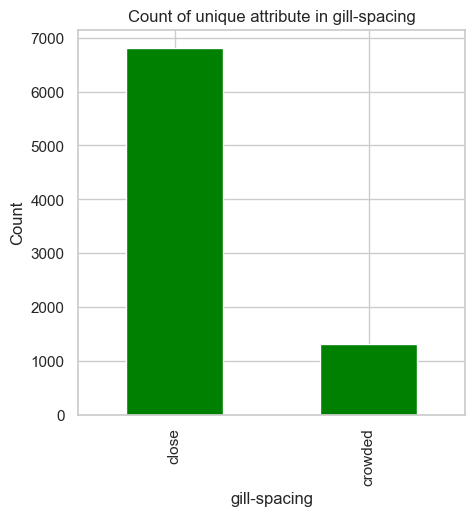

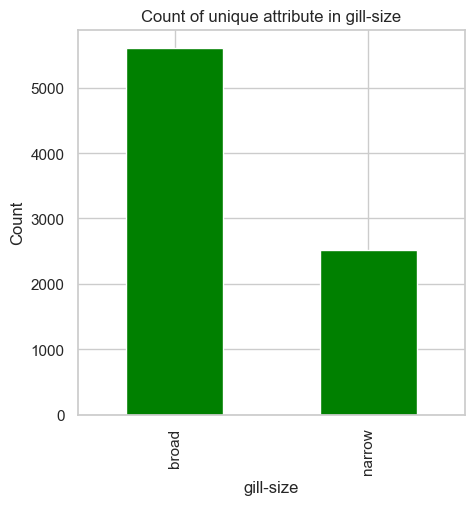

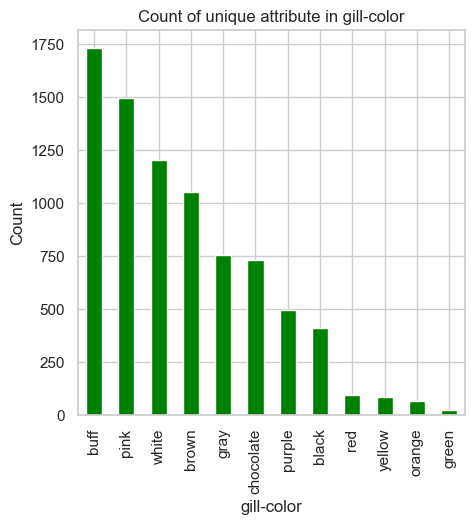

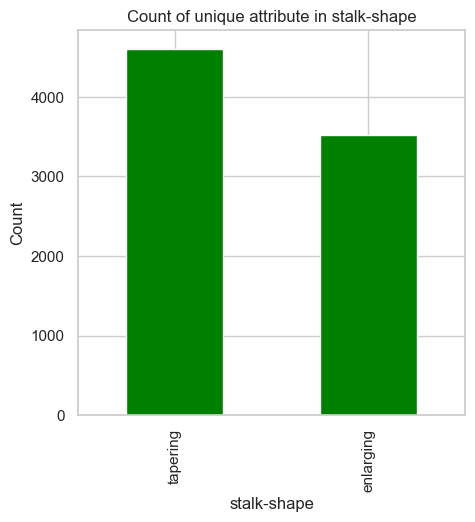

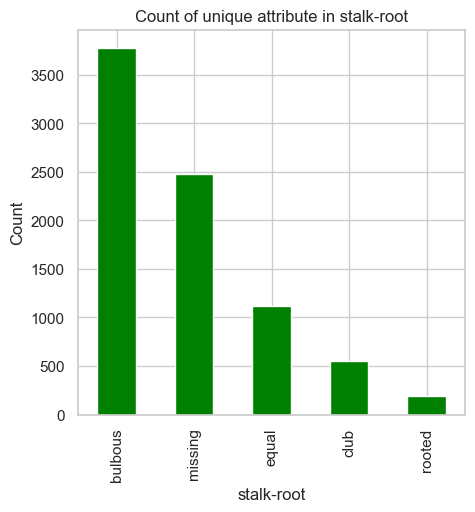

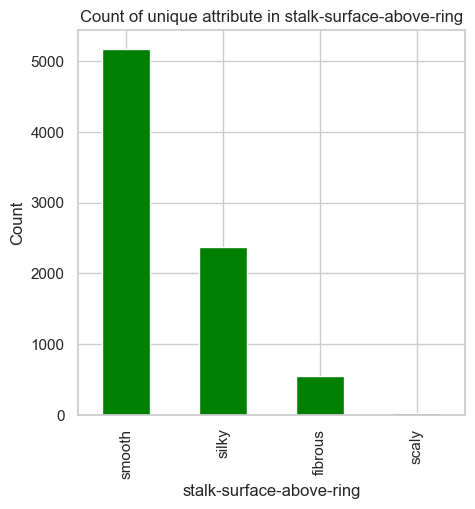

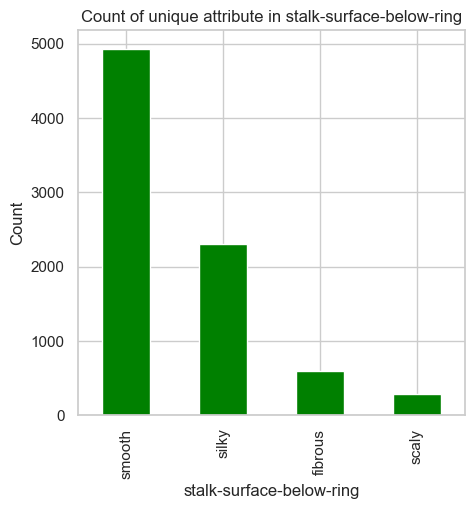

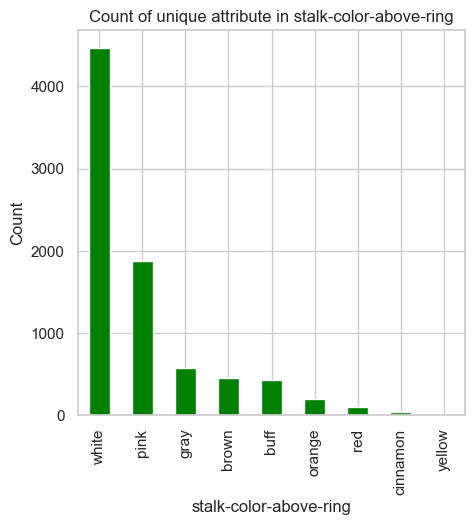

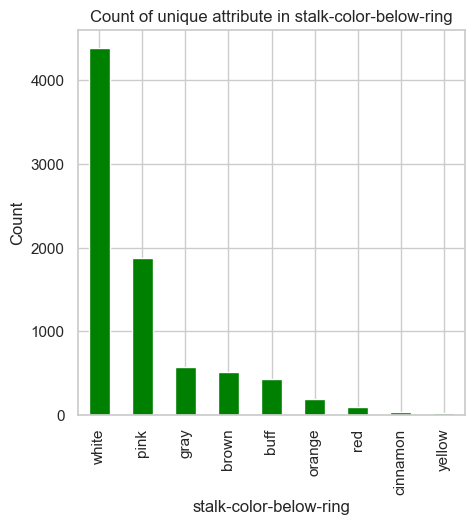

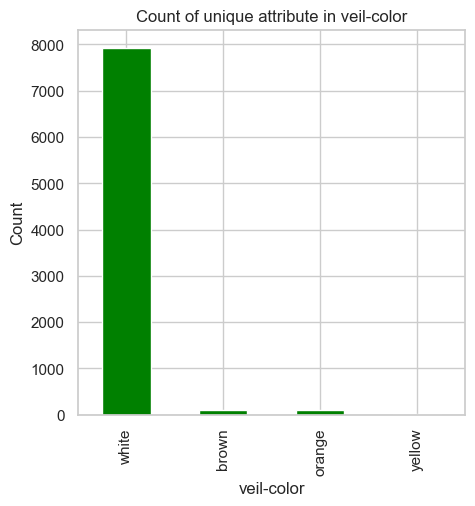

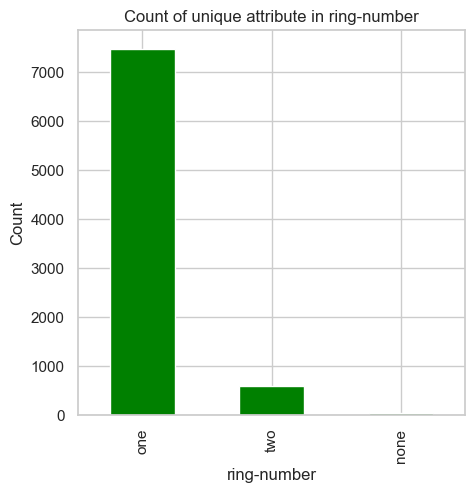

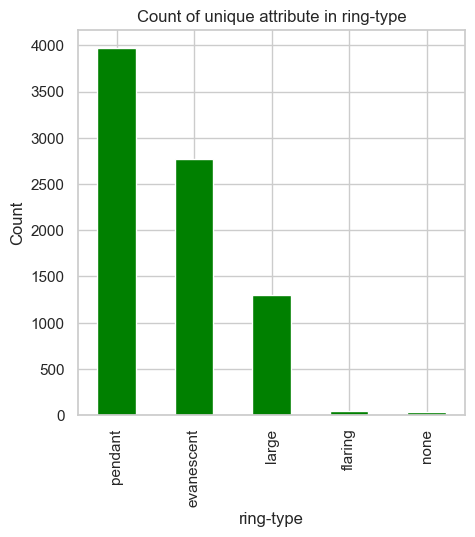

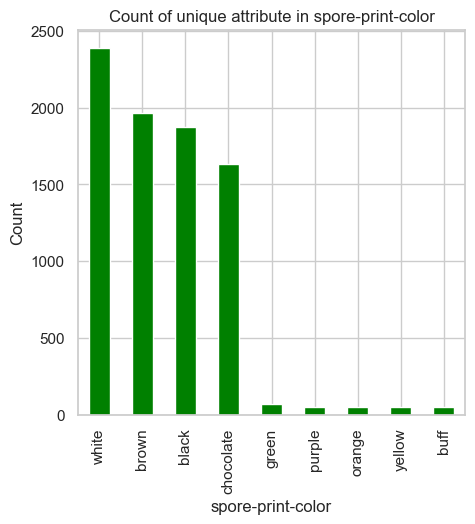

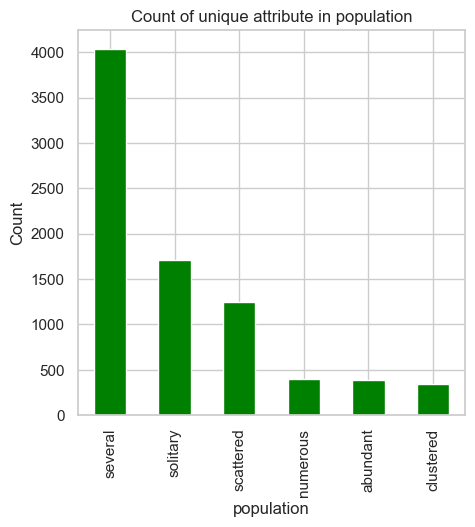

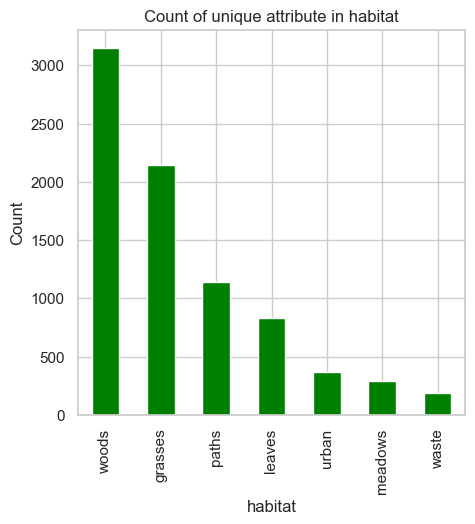

In [123]:
for attribute in df.columns:
    counting = df[attribute].value_counts()

    plt.figure(figsize=(5, 5))
    plt.tight_layout()
    counting.plot(kind = 'bar', color ='green')
    plt.title(f'Count of unique attribute in {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Count')

Below Attribute feautre likely to make model has bias:
- gill-atteachment 
- ring-number 
- veil-color 

Drop them.

In [124]:
df = df.drop(['gill-attachment', 'ring-number', 'veil-color'], axis=1)

In [125]:
df.to_csv('CleanedData.csv', index = False)
